# Final Project: Credit Card Clustering

#### Group Members: Diya Patel, Hannah Raju, Birava Savalia, Jessica Schatz, Prachi Yadav, Varshita Yarabadi

Data Source:

https://www.kaggle.com/datasets/arjunbhasin2013/ccdata 

## Import Packages

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

## Read Data (H.R)

In [57]:
df = pd.read_csv('CC_GENERAL.csv')

In [58]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [59]:
df.shape

(8950, 18)

## Pre-processing - Check Nulls, Change Data Types, Add/Edit Columns (H.R)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [61]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [62]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [63]:
# Using median rather than mean because of skewed data
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [64]:
df = df.dropna()

df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [65]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [66]:
# Look at skew of each feature in the dataset (0 = symmetical, pos = skewed right, neg = skewed left)
df.skew(axis = 0, numeric_only=True)

BALANCE                              2.393270
BALANCE_FREQUENCY                   -2.024193
PURCHASES                            8.143969
ONEOFF_PURCHASES                    10.044622
INSTALLMENTS_PURCHASES               7.298823
CASH_ADVANCE                         5.166323
PURCHASES_FREQUENCY                  0.059970
ONEOFF_PURCHASES_FREQUENCY           1.535453
PURCHASES_INSTALLMENTS_FREQUENCY     0.509023
CASH_ADVANCE_FREQUENCY               1.828644
CASH_ADVANCE_TRX                     5.720976
PURCHASES_TRX                        4.630493
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907465
MINIMUM_PAYMENTS                    13.851853
PRC_FULL_PAYMENT                     1.942641
TENURE                              -2.944788
dtype: float64

In [67]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [68]:
# All columns excluding 'CUST_ID'
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

target = 'CUST_ID'

In [69]:
# Function to plot boxplots
def plot_boxplot(df, ft):
    df.boxplot(column = [ft])
    plt.show()

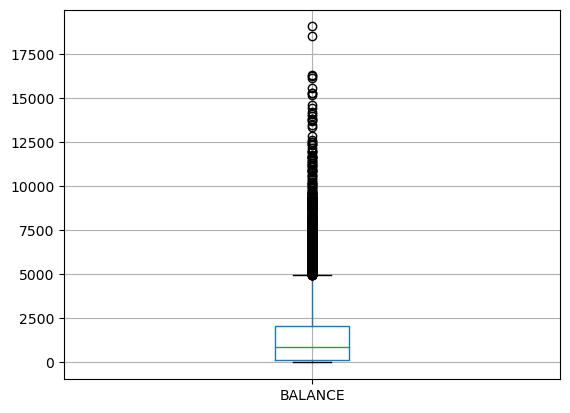

In [70]:
plot_boxplot(df, 'BALANCE')

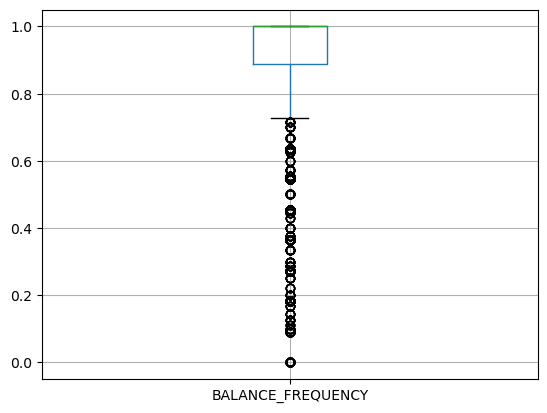

In [71]:
plot_boxplot(df, 'BALANCE_FREQUENCY')

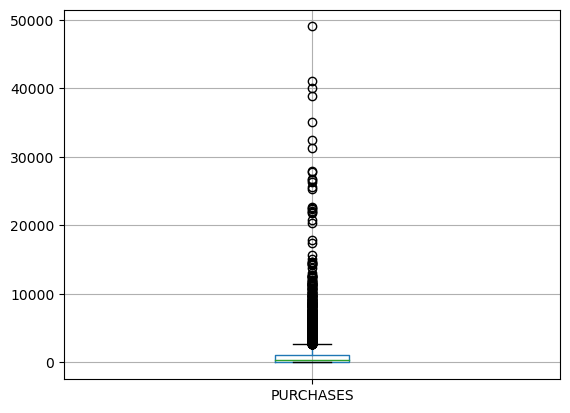

In [72]:
plot_boxplot(df, 'PURCHASES')

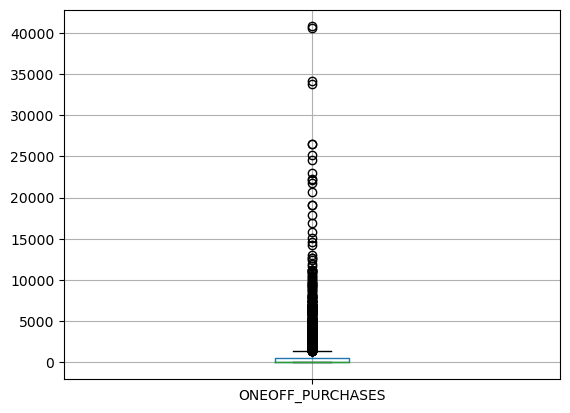

In [73]:
plot_boxplot(df, 'ONEOFF_PURCHASES')      

In [74]:
# Function to detect outliers and save index values into a list that is returned
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]

    return ls

In [75]:
# Get all outliers from the original dataframe
index_list = []

for feature in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']:
       index_list.extend(outliers(df, feature))

In [76]:
index_list

[15,
 21,
 24,
 28,
 30,
 32,
 36,
 38,
 44,
 59,
 70,
 75,
 79,
 86,
 87,
 89,
 90,
 107,
 109,
 112,
 113,
 120,
 124,
 128,
 133,
 138,
 142,
 143,
 150,
 153,
 156,
 165,
 174,
 193,
 195,
 199,
 203,
 207,
 208,
 210,
 220,
 223,
 224,
 236,
 248,
 249,
 254,
 258,
 263,
 265,
 273,
 274,
 280,
 289,
 291,
 297,
 304,
 321,
 322,
 352,
 357,
 367,
 368,
 369,
 371,
 376,
 380,
 387,
 393,
 398,
 404,
 416,
 417,
 423,
 428,
 429,
 430,
 435,
 441,
 445,
 451,
 453,
 468,
 470,
 488,
 491,
 495,
 501,
 509,
 520,
 526,
 537,
 539,
 545,
 550,
 551,
 552,
 557,
 558,
 569,
 576,
 577,
 582,
 585,
 591,
 597,
 602,
 606,
 610,
 613,
 615,
 622,
 637,
 643,
 646,
 647,
 652,
 669,
 676,
 679,
 681,
 696,
 708,
 710,
 716,
 723,
 726,
 735,
 739,
 755,
 757,
 760,
 762,
 763,
 768,
 780,
 782,
 786,
 800,
 842,
 848,
 851,
 853,
 856,
 866,
 878,
 883,
 886,
 898,
 902,
 903,
 909,
 916,
 922,
 928,
 939,
 977,
 989,
 1012,
 1029,
 1030,
 1033,
 1037,
 1042,
 1059,
 1063,
 1091,
 1100,

In [77]:
# Function that removes all the outliers that were detected and saved into a list
def remove_outliers(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [78]:
# Remove all ooutliers from original dataframe and save it into df_clean 
df_clean = remove_outliers(df, index_list)

In [79]:
# Check how many values were removed
df_clean.shape

(2986, 18)

In [80]:
# Scale orginal dataframe
from sklearn.preprocessing import StandardScaler
X = df.loc[:, features].values

y = df.loc[:, target].values

X = StandardScaler().fit_transform(X)

X.shape

(8949, 17)

In [81]:
# Scale cleaned dataframe
X_clean = df_clean.loc[:, features].values

y_clean = df_clean.loc[:, target].values

X_clean  = StandardScaler().fit_transform(X_clean)

X_clean.shape

(2986, 17)

## Data Understanding (H.R)

In [82]:
# Look at orginal dataframe
#sns.pairplot(df)
#plt.show()

In [83]:
# Look at cleaned dataframe
#sns.pairplot(df_clean)
#plt.show()

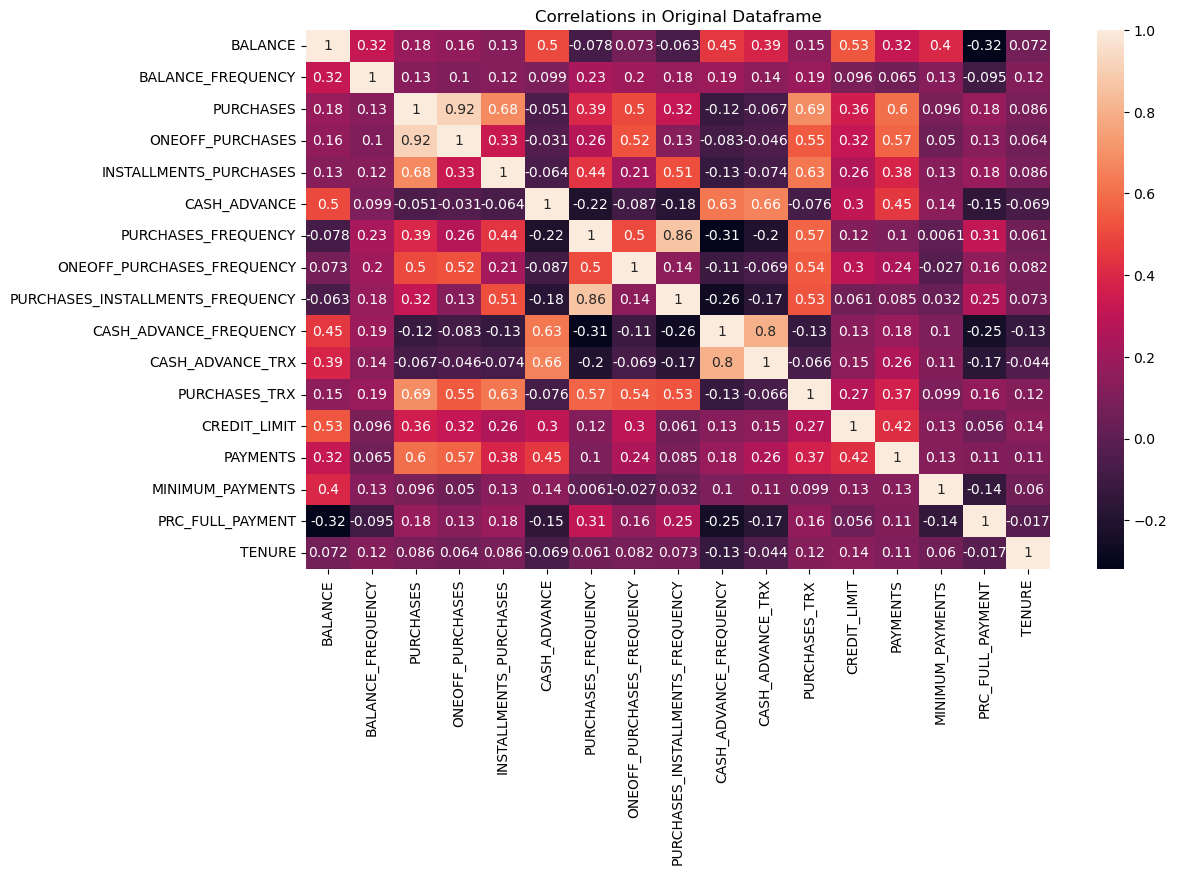

In [84]:
# Look at correlations in original dataframe
plt.figure(figsize=(12,7))
plt.title("Correlations in Original Dataframe")
sns.heatmap(df.corr(), annot=True)
plt.show()

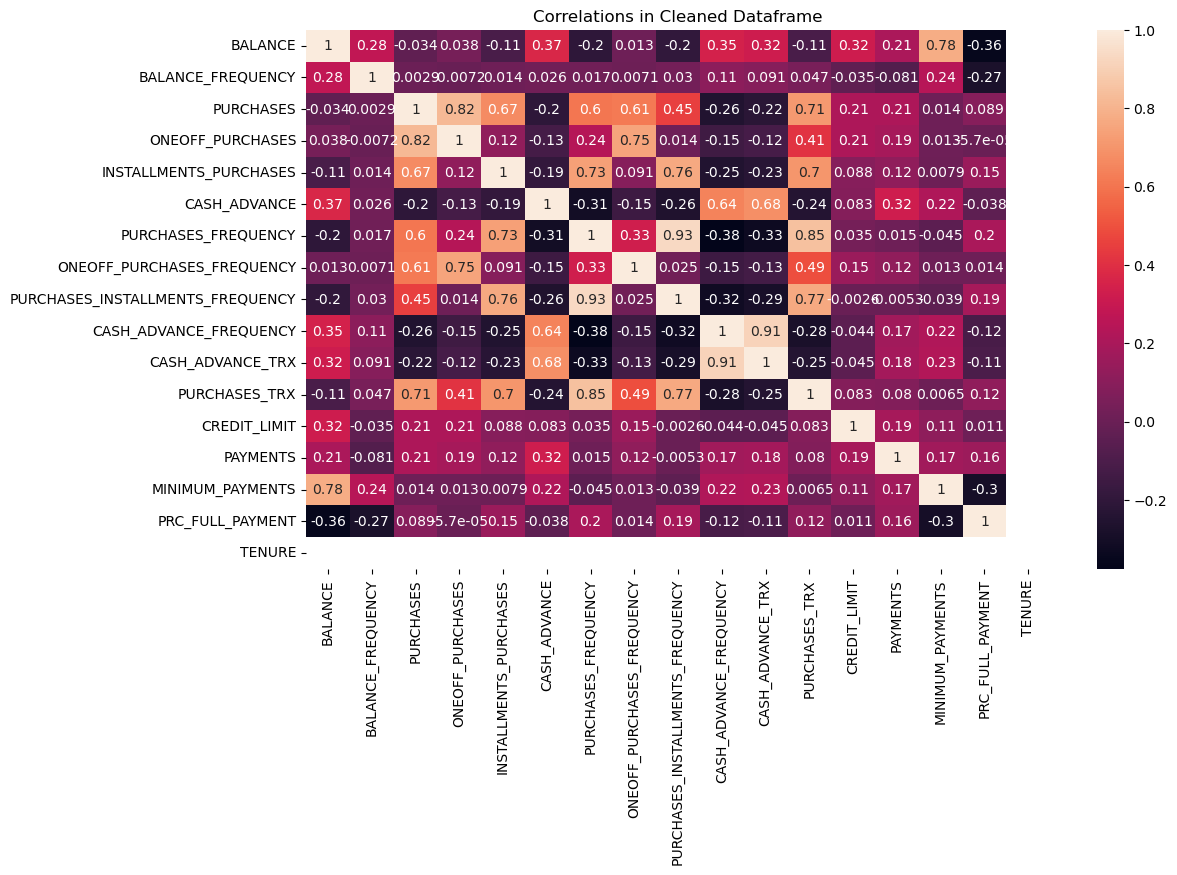

In [85]:
# Look at correlations in cleaned dataframe
plt.figure(figsize=(12,7))
plt.title("Correlations in Cleaned Dataframe")
sns.heatmap(df_clean.corr(), annot=True)
plt.show()

<hr>

## PCA (H.R)

In [86]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

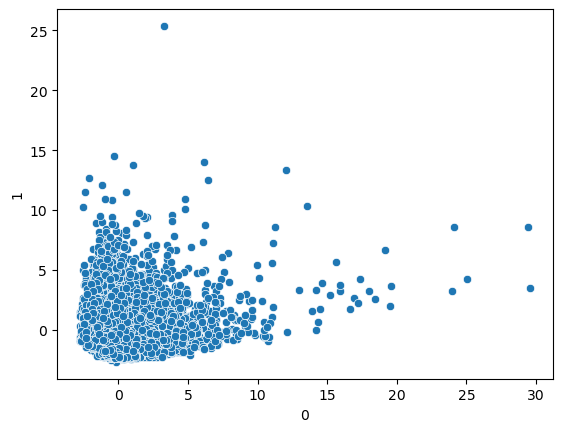

In [87]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])
plt.show()

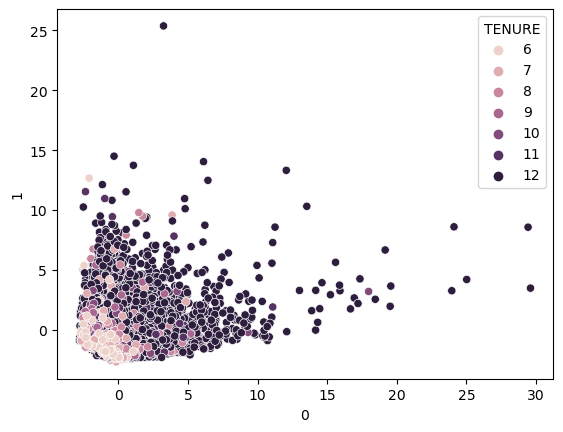

In [88]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['TENURE'])
plt.show()

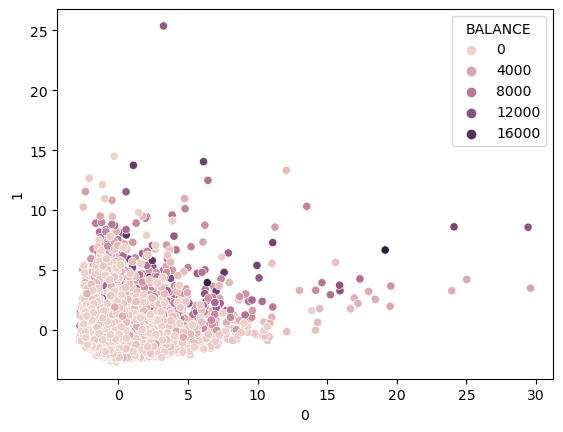

In [89]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['BALANCE'])
plt.show()

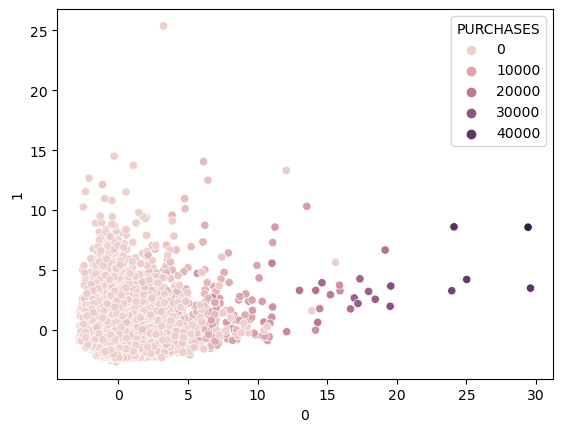

In [90]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['PURCHASES'])
plt.show()

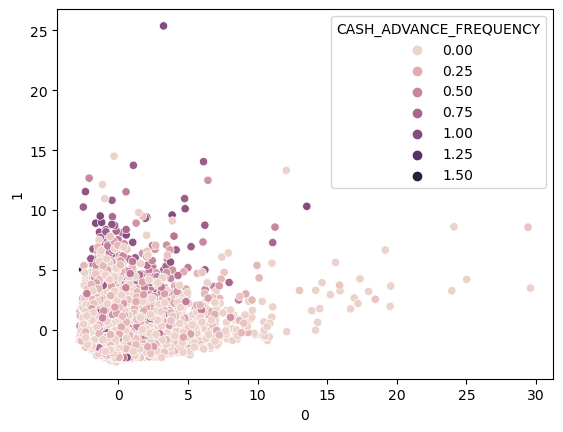

In [91]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['CASH_ADVANCE_FREQUENCY'])
plt.show()

## K-Means Clustering with PCA (H.R)

In [92]:
inertia = []
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

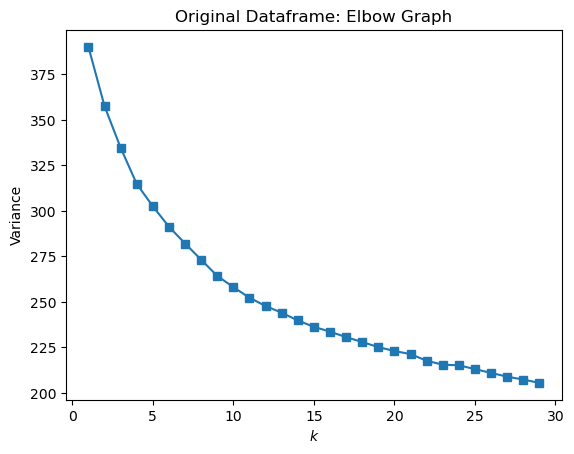

In [93]:
plt.plot(range(1, 30), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')
plt.title("Original Dataframe: Elbow Graph")
plt.show()

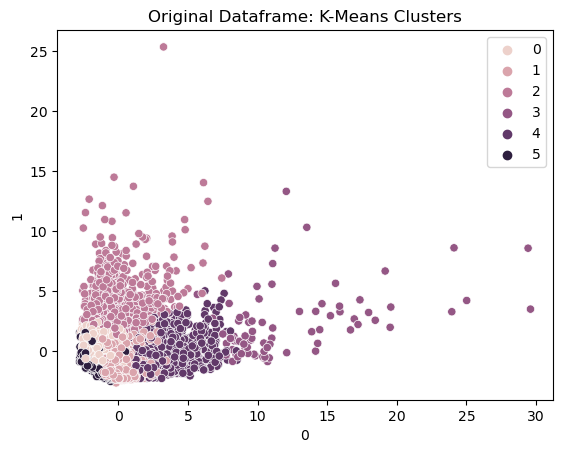

In [94]:
#create KMeans model
kmeans = KMeans(n_clusters=6, random_state=1).fit(X)

y = kmeans.fit_predict(X)

sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)
plt.title("Original Dataframe: K-Means Clusters")
plt.show()

## PCA & K-Means with Cleaned DF (H.R)

In [95]:
#Create PCA model with cleaned df
pca = PCA(n_components=2)
pca_mdl_clean = pca.fit_transform(X_clean)
pca_df_clean = pd.DataFrame(pca_mdl_clean)

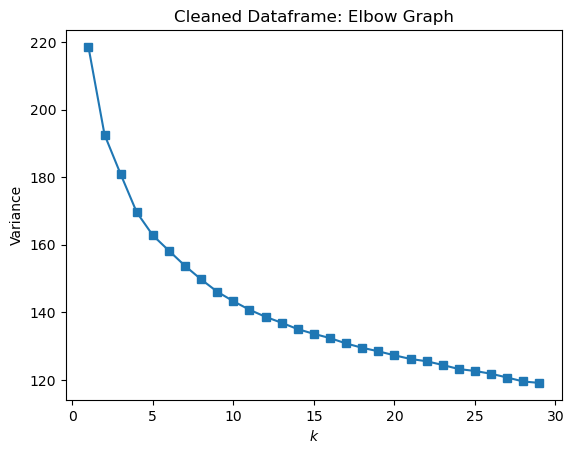

In [96]:
inertia = []
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_clean)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 30), inertia, marker='s');
plt.xlabel('$k$')
plt.title("Cleaned Dataframe: Elbow Graph")
plt.ylabel('Variance')
plt.show()

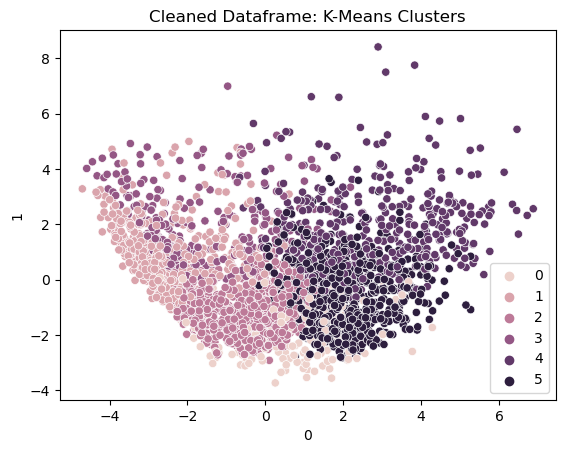

In [97]:
#create KMeans model
kmeans = KMeans(n_clusters=6, random_state=1).fit(X_clean)

y_clean = kmeans.fit_predict(X_clean)

sns.scatterplot(x = pca_df_clean[0], y = pca_df_clean[1], hue=y_clean)
plt.title("Cleaned Dataframe: K-Means Clusters")
plt.show()